# Task 3

## General instructions

First, update the following cell to have a link to your Homework 1 GitHub repository

**UPDATE THIS LINK**

https://github.com/carmengg/eds-220-hwk-2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Acknowledgments

This exercise is based on this [NCEAS Learning Hub R lesson](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).

Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.

## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed here at KNB:

 [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886- 1997). Gulf of Alaska Data Portal. df35b.304.2.](https://knb.ecoinformatics.org/view/df35b.304.2)

The dataset is in csv format and has the following columns:

- Region: region code
- Year: year fish were caught
- notesRegCode: notes and comments
- Species: species of salmon caught
- Catch: commercial catches of salmon species (in tousands of fish)


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

In [210]:
### ===== FINAL CODE =====

## 1

Import the data from the `salmon_data.csv` as `catch_original` and look at the head of the dataframe.

In [271]:
# solve exercise here
import pandas as pd
import matplotlib.pyplot as plt

catch_original = pd.read_csv("~/EDS220/eds220-hwk-2/salmon_data.csv")


catch_original.head()


,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


## 2
In the next cell:
1. Print the unique values of the `notesRegCode` column. 
2. Update the dataframe so it doesn't have the `notesRegCode` column.
3. Verify the column is no longer in the dataframe.

In [272]:
# solve exercise here

#1
catch_original.notesRegCode.unique()
#2
catch_original.drop("notesRegCode", axis=1)




,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0
...,...,...,...,...
8535,NOP,1993,Chum,135
8536,NOP,1994,Chum,84
8537,NOP,1995,Chum,99
8538,NOP,1996,Chum,68


## 3
In the next cell, check the data types of the columns. Does each column have the expected data type? Write your answer as a short comment in the same cell.


In [273]:
# solve exercise here

catch_original.dtypes

# ANSWER: I would expect the Catch column to have an int64 data type

Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`.

Run the next cell and read the end of the error message closely.

In [274]:
# to use `astype` we select a specifc column
#  and then indicate the dtype we want to convert to
#  astype does not modify the column in place
catch_original.Catch.astype('int64') 

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out this data set is from a PDF which was automatically converted into a csv and this value of 'I' is actually a 1.

In the next cell find the row(s) that is causing this issue. 

In [275]:
# solve exercise here

catch_original[catch_original.Catch == "I"]


,Region,Year,notesRegCode,Species,Catch
400,GSE,1955,NaN,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1. HINT: you could use the `at` method to access a single value in the dataframe.
2. Access the row you updated to verify the value was changed.

In [276]:
# solve exercise here
catch_original.Catch.at[400]=1

## 7
In the next cell:

1. Update the Catch column in `catch_data` to be of type `int64`.
2. Check the dtypes of the columns.

In [277]:
# solve exercise here
catch_original['Catch'] = catch_original.Catch.astype('int64') 


#2 check the dtypes of the columns. 
catch_original.dtypes

### delete later ###
catch_original

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0
...,...,...,...,...,...
8535,NOP,1993,NaN,Chum,135
8536,NOP,1994,NaN,Chum,84
8537,NOP,1995,NaN,Chum,99
8538,NOP,1996,NaN,Chum,68


## 8
Create a dataframe with the average catch per region. HINT: use `groupby()`. Store your dataframe in new variable.


In [285]:
# solve exercise here
new_catch = catch_original
new_catch['averaged_catch_reg'] = catch_original.groupby('Region')['Catch'].transform('mean')
new_catch

,Region,Year,notesRegCode,Species,Catch,averaged_catch_reg
0,SSE,1886,NaN,Chinook,0,3184.660714
1,SSE,1887,NaN,Chinook,0,3184.660714
2,SSE,1888,NaN,Chinook,0,3184.660714
3,SSE,1889,NaN,Chinook,0,3184.660714
4,SSE,1890,NaN,Chinook,0,3184.660714
...,...,...,...,...,...,...
8535,NOP,1993,NaN,Chum,135,229.493478
8536,NOP,1994,NaN,Chum,84,229.493478
8537,NOP,1995,NaN,Chum,99,229.493478
8538,NOP,1996,NaN,Chum,68,229.493478


## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

Text(0.5, 1.0, 'Average Salmon Catches by Region between 1878 to 1997')

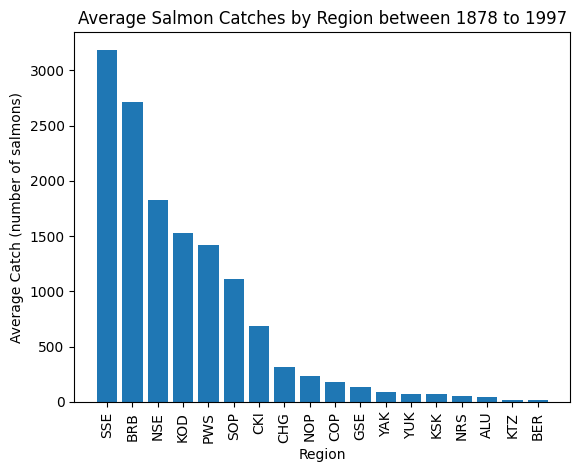

In [288]:
# solve exercise here
import matplotlib.pyplot as plt


# sort regions based on average catch values
average_catch_reg = new_catch.sort_values(by='averaged_catch_reg', ascending = False)

#basically every region should have its own associate value, 
#and then every region should be sorted on the x axis based on magnitude

plt.bar(average_catch_reg['Region'], average_catch_reg['averaged_catch_reg'])

#plt.show()
plt.xticks(rotation=90)

plt.xlabel('Region')
plt.ylabel('Average Catch (number of salmons)') 
plt.title('Average Salmon Catches by Region between 1878 to 1997') 



## 10

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.